**Importing CSV File From Local**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving hepatitis_csv.csv to hepatitis_csv.csv


**Importing Required Libraries**

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

**Loading DataFrame**

In [4]:
hepatitis = pd.read_csv("hepatitis_csv.csv")
print(hepatitis.head())

   age     sex steroid  antivirals  ... albumin protime histology class
0   30    male   False       False  ...     4.0     NaN     False  live
1   50  female   False       False  ...     3.5     NaN     False  live
2   78  female    True       False  ...     4.0     NaN     False  live
3   31  female     NaN        True  ...     4.0    80.0     False  live
4   34  female    True       False  ...     4.0     NaN     False  live

[5 rows x 20 columns]


**Exploratory Data Analysis**

*Check for DataFrame Shape*

In [9]:
print("Number of Instances: ",hepatitis.shape[0])
print("Number of Features: ",hepatitis.shape[1])

Number of Instances:  155
Number of Features:  20


*Check for Feature Names*

In [12]:
print("Features Available: ",hepatitis.columns)

Features Available:  Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')


*Check for Non-Null and feature type*

In [61]:
print(hepatitis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  histology       

*Hepatitis Dataframe Summary*

In [62]:
print(hepatitis.describe())

              age   bilirubin  alk_phosphate       sgot     albumin
count  155.000000  149.000000     126.000000  151.00000  139.000000
mean    41.200000    1.427517     105.325397   85.89404    3.817266
std     12.565878    1.212149      51.508109   89.65089    0.651523
min      7.000000    0.300000      26.000000   14.00000    2.100000
25%     32.000000    0.700000      74.250000   31.50000    3.400000
50%     39.000000    1.000000      85.000000   58.00000    4.000000
75%     50.000000    1.500000     132.250000  100.50000    4.200000
max     78.000000    8.000000     295.000000  648.00000    6.400000


*Check for Null Values*

In [18]:
print(hepatitis.isnull().sum())

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64


**Handling Missing Values**

In [69]:
miss_col = []
for col in hepatitis.columns:
    if hepatitis[col].isnull().sum() > 0:
        miss_col.append(col)
print("Columns with missing values: ",miss_col)
print("Count with Columns: ",len(miss_col))

for col in miss_col:
    hepatitis[col] = hepatitis[col].fillna(hepatitis[col].mode()[0])

Columns with missing values:  ['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin']
Count with Columns:  14


*Re-Check for Missing Values*

In [70]:
print(hepatitis.isnull().sum())

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
histology          0
class              0
dtype: int64


**Data Cleaning**

In [48]:
min_saturation = hepatitis.shape[0]//3
drop_col = []

for col in hepatitis.columns:
    if hepatitis[col].isnull().sum() > min_saturation:
        drop_col.append(col)

print("Columns with more than 30% of Null Values:", drop_col)
hepatitis = hepatitis.drop(drop_col, axis=1)
print(hepatitis.isnull().sum())

Columns with more than 30% of Null Values: []


**Data Visualization**

<Figure size 720x504 with 0 Axes>

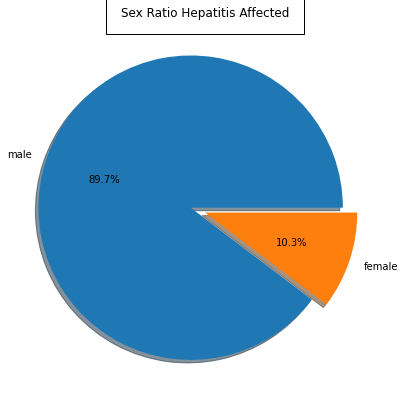

In [56]:
data = hepatitis['sex']
fig = plt.figure(figsize =(10, 7))
sex_cat = []
sex_cat.append(hepatitis['sex'].value_counts()[0])
sex_cat.append(hepatitis['sex'].value_counts()[1])

fig = plt.figure(figsize =(10, 7))
explode = explode = (0.1, 0) 
plt.pie(sex_cat, labels = ['male','female'], autopct='%1.1f%%', shadow=True, startangle=0, explode=explode)
plt.title("Sex Ratio Hepatitis Affected", bbox={'facecolor':'1', 'pad':15})
plt.show()

<Figure size 720x504 with 0 Axes>

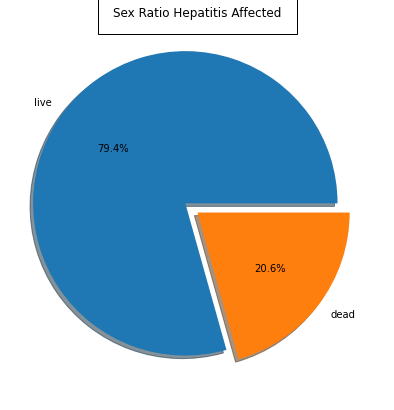

In [57]:
data = hepatitis['class']
fig = plt.figure(figsize =(10, 7))
sex_cat = []
sex_cat.append(hepatitis['class'].value_counts()[0])
sex_cat.append(hepatitis['class'].value_counts()[1])

fig = plt.figure(figsize =(10, 7))
explode = explode = (0.1, 0) 
plt.pie(sex_cat, labels = ['live','dead'], autopct='%1.1f%%', shadow=True, startangle=0, explode=explode)
plt.title("Sex Ratio Hepatitis Affected", bbox={'facecolor':'1', 'pad':15})
plt.show()

In [79]:
print(hepatitis['steroid'].value_counts)

<bound method IndexOpsMixin.value_counts of 0      False
1      False
2       True
3       True
4       True
       ...  
150     True
151     True
152    False
153    False
154     True
Name: steroid, Length: 155, dtype: bool>


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 28.97691
Feature: 3, Score: -0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: 26.51097
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: 67.16261
Feature: 10, Score: 7.74776
Feature: 11, Score: -0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: -0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 52.80671
Feature: 18, Score: -0.00000


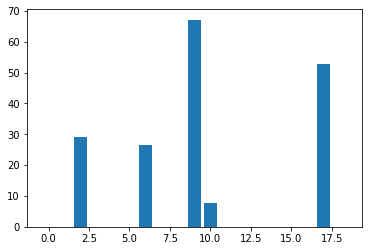

In [81]:
X, y = make_regression(n_samples=155, n_features=len(hepatitis.columns), n_informative=5, random_state=1)

model = LinearRegression()

model.fit(X, y)

importance = model.coef_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()